In [368]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf 
from itertools import product 
import talib as ta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics
plt.style.use('seaborn')
import itertools
import seaborn as sns

In [369]:
def plot_conf_mat(cm, classes, title, cmap = plt.cm.Blues):                                 
    #Plot confusion matrix to see True Positives, False Positives, True Negatives and False Negatives 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    #why cm.max()  /2??
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="green" if cm[i, j] > thresh else "red", fontsize = 20)

        plt.tight_layout()
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')

In [370]:
def model_evaluation(y_pred, y_test):
    c_mat = confusion_matrix(y_test, y_pred, normalize = 'all') ## Predicted vs. actual outcome
    auc = round(roc_auc_score(y_test, y_pred),4)
    accuracy = round(accuracy_score(y_test,y_pred) ,4)
    recall = round(recall_score(y_test, y_pred),4)
    precision = round(precision_score(y_test, y_pred),4)
    class_names = ['Positive', 'Negative'] ## Different class names
    plt.figure()
    fig, ax = plt.subplots(figsize=(6,4))
    plot_conf_mat(c_mat,classes=class_names,title="Confusion Matrix")
    plt.show()
    print(f"Accuracy: {accuracy}")
    print(f"Area under the curve (AUC): {auc}")
    print(f"Recall Score: {recall}")
    auc = round(roc_auc_score(y_test, y_pred), 4)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b',
    label='AUC = %0.2f'% auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



In [371]:
def grid_ser(param_grid, model, X_train, y_train):

  
  
      grid = GridSearchCV(model,param_grid, cv=5, verbose = 2, n_jobs = -1)
  
      grid.fit(X_train, y_train)
  
      result = {"best_params": grid.best_params_, 'best_estimator': grid.best_estimator_, 
            'best_score':grid.best_score_ }
  
      return result

In [372]:
df = yf.download(tickers='BTC-USD', start='2015-01-01', end='2019-12-30', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [373]:
df['returns'] = np.log(df['Close']/df['Close'].shift(1))
df.dropna(inplace= True)

In [375]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,0.002489
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,-0.114028
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,-0.061959
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,0.038169
2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,0.041796
2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800,0.028073
2015-01-08,294.135010,294.135010,282.174988,283.348999,283.348999,19982500,-0.038046
2015-01-09,282.382996,291.114014,280.532990,290.407990,290.407990,18718600,0.024607
2015-01-10,287.303009,288.127014,273.966003,274.795990,274.795990,15264300,-0.055258


<AxesSubplot:xlabel='Date'>

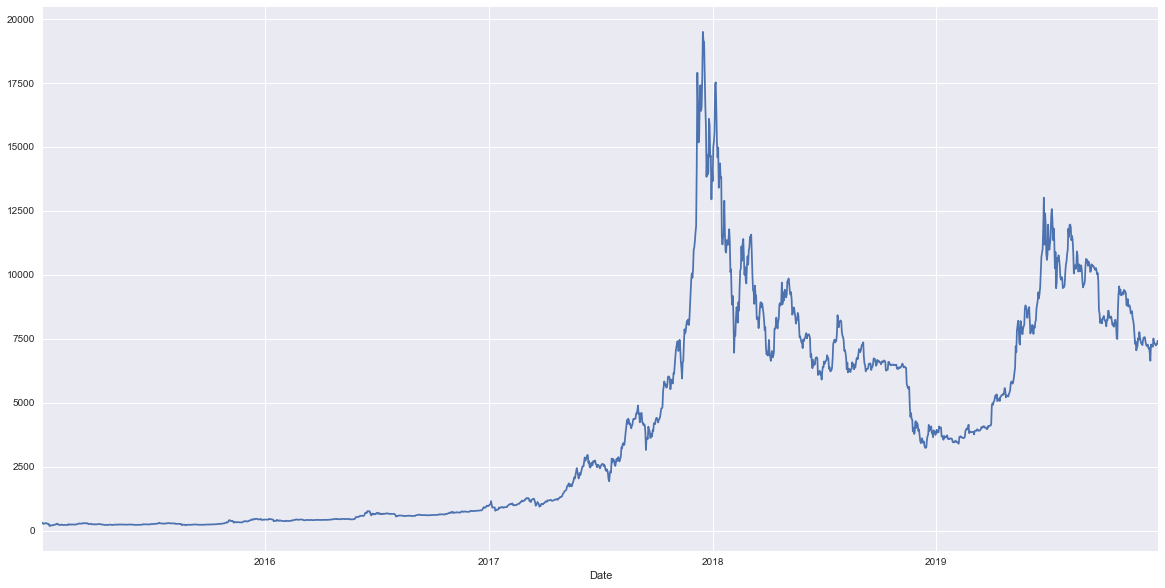

In [271]:
df.Close.plot(figsize=(20,10))

In [272]:
df['EMA_S'] = ta.EMA(df['returns'], timeperiod= 50)
df['EMA_L'] = ta.EMA(df['returns'], timeperiod= 100)

Text(0.5, 1.0, 'EMA50 | EMA100')

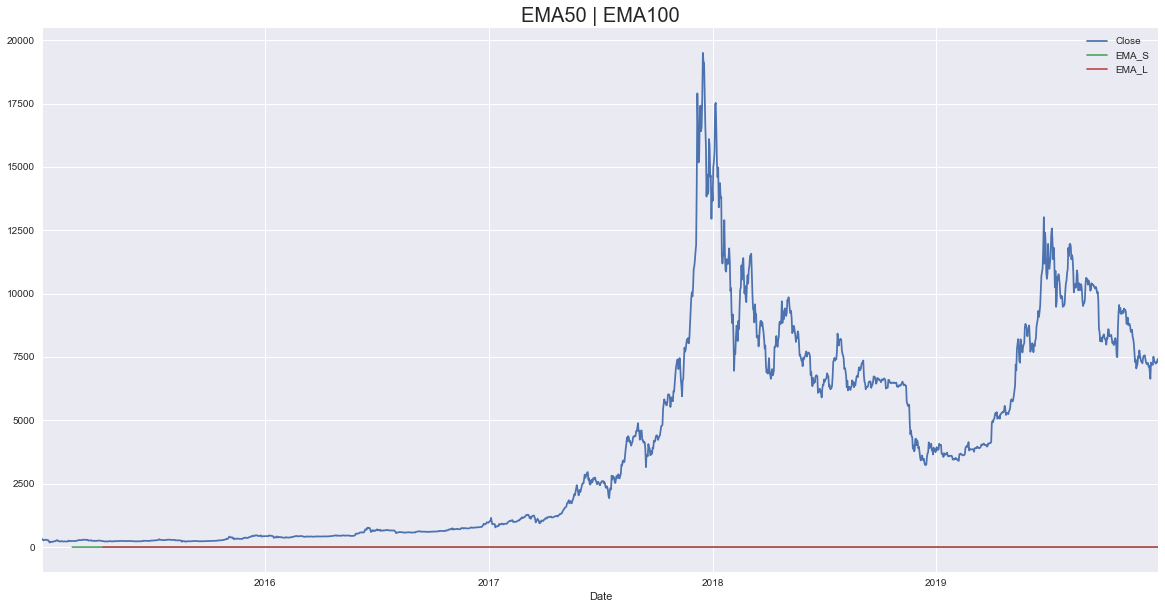

In [273]:
df[['Close', 'EMA_S', 'EMA_L']].plot(figsize=(20,10))
plt.title('EMA50 | EMA100', fontsize= 20)

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1824 entries, 2015-01-02 to 2019-12-30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1824 non-null   float64
 1   High       1824 non-null   float64
 2   Low        1824 non-null   float64
 3   Close      1824 non-null   float64
 4   Adj Close  1824 non-null   float64
 5   Volume     1824 non-null   int64  
 6   returns    1824 non-null   float64
 7   EMA_S      1775 non-null   float64
 8   EMA_L      1725 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 142.5 KB


In [275]:
df['returns'] = np.log(df['Close']/df['Close'].shift(1))
df['target'] = np.where(df['returns'] > 0, 1, 0) 

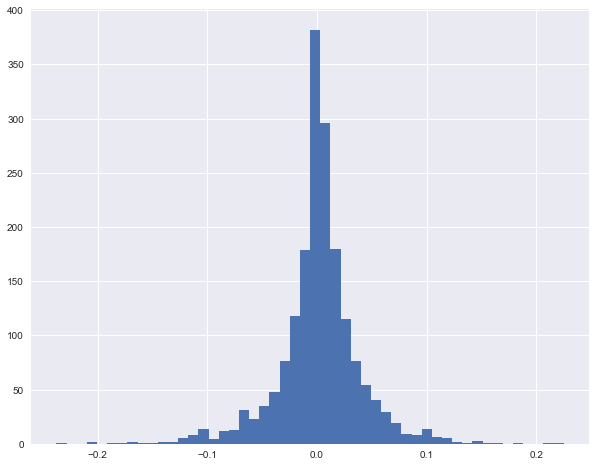

In [276]:
plt.figure(figsize = (10,8))
plt.hist(df['returns'], bins= 50);

In [278]:
def test_EMA(EMA):
    data = df.copy()
    data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
    data["EMA_S"] = data.returns.ewm(int(EMA[0])).mean()
    data["EMA_L"] = data.returns.ewm(int(EMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["EMA_S"] > data["EMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return np.exp(data["strategy"].sum())

In [279]:
test_EMA((20,100))

7.822025132555922

In [280]:
EMA_S_range = range(1,40, 1)
EMA_L_range = range(50,100, 1)

In [281]:
combinations = list(product(EMA_S_range, EMA_L_range))

In [282]:
 len(combinations)

1950

In [283]:
resutls = []
for comb in combinations:
    resutls.append(test_EMA(comb))

In [284]:
resutls

[62.14808647520358,
 72.71862715510099,
 65.96421542804181,
 69.00597256972401,
 71.15914481043978,
 77.93935513718986,
 92.51422478126983,
 92.2567220633219,
 92.2567220633219,
 85.03473884633419,
 94.56846290328262,
 93.77912658717622,
 94.14564803360916,
 97.39699613156805,
 98.91225887096853,
 98.91225887096853,
 87.54356285215887,
 79.57231385412567,
 83.8198645406789,
 83.8198645406789,
 83.8198645406789,
 77.69873809173406,
 76.62690538185076,
 76.62690538185076,
 76.62690538185076,
 73.49231887274854,
 65.52618361701923,
 65.52618361701923,
 62.87269600771536,
 62.90302563510281,
 62.90302563510281,
 62.90302563510281,
 65.42057314730948,
 65.42057314730948,
 65.42057314730948,
 65.42057314730948,
 73.71912902272531,
 84.25309533336014,
 84.25309533336014,
 89.1544853088704,
 88.92800886964524,
 84.25424375191744,
 86.21408274919828,
 86.21408274919828,
 91.05995289052514,
 105.02501654285706,
 106.94525038097126,
 106.94525038097126,
 106.94525038097126,
 106.94525038097126,
 

In [285]:
np.max(resutls)

407.02449344691814

In [286]:
np.argmax(resutls)

361

In [287]:
combinations[np.argmax(resutls)]

(8, 61)

In [288]:
all_results = pd.DataFrame(data = combinations, columns=['EMA_S', 'EMA_L'])

In [289]:
all_results

,EMA_S,EMA_L
0,1,50
1,1,51
2,1,52
3,1,53
4,1,54
...,...,...
1945,39,95
1946,39,96
1947,39,97
1948,39,98


In [290]:
all_results['performance'] = resutls

In [291]:
all_results.head()

,EMA_S,EMA_L,performance
0,1,50,62.148086
1,1,51,72.718627
2,1,52,65.964215
3,1,53,69.005973
4,1,54,71.159145


In [292]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,EMA_S,EMA_L,target
Date,,,,,,,,,,
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,NaN,NaN,NaN,0
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,-0.114028,NaN,NaN,0
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,-0.061959,NaN,NaN,0
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,0.038169,NaN,NaN,1
2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,0.041796,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
2019-12-26,7274.799316,7388.302734,7200.386719,7238.966797,7238.966797,22787010034,-0.004987,-0.002077,-0.002157,0
2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,22777360996,0.007037,-0.001720,-0.001975,1
2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,21365673026,0.003820,-0.001503,-0.001860,1


In [293]:
all_results.nlargest(10, 'performance')

,EMA_S,EMA_L,performance
361,8,61,407.024493
398,8,98,384.246348
486,10,86,383.569210
487,10,87,382.946624
530,11,80,375.224183
529,11,79,373.882378
531,11,81,373.565597
445,9,95,366.740549
528,11,78,366.538061
527,11,77,364.981115


In [294]:
all_results.nsmallest(10, 'performance')

,EMA_S,EMA_L,performance
1746,35,96,4.909758
1697,34,97,5.340355
1744,35,94,5.355358
1698,34,98,5.398389
1747,35,97,5.557010
1745,35,95,5.590466
1797,36,97,5.746850
1843,37,93,5.798111
1699,34,99,5.859615
1696,34,96,6.012060


In [295]:
df['op_EMA_S'] = ta.EMA(df['returns'], timeperiod = 8)
df['op_EMA_L'] = ta.EMA(df['returns'], timeperiod = 61)

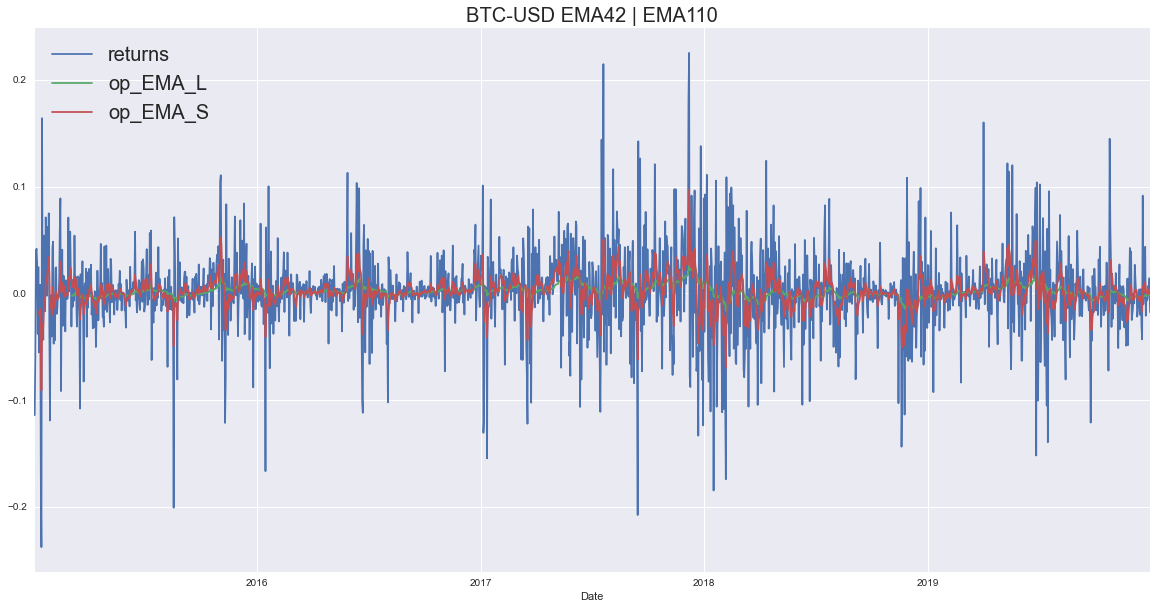

In [297]:
df[['returns', 'op_EMA_L', 'op_EMA_S']].plot(figsize=(20,10))
plt.title('BTC-USD EMA42 | EMA110', fontsize = 20)
plt.legend(fontsize =20)

In [298]:
df['Close_EMA_S'] = np.where(df['returns']> df['EMA_S'], 1, -1)
df['op_EMA_signal'] = np.where(df['op_EMA_S'] > df['op_EMA_L'], 1, -1)
df

,Open,High,Low,Close,Adj Close,Volume,returns,EMA_S,EMA_L,target,op_EMA_S,op_EMA_L,Close_EMA_S,op_EMA_signal
Date,,,,,,,,,,,,,,
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,NaN,NaN,NaN,0,NaN,NaN,-1,-1
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,-0.114028,NaN,NaN,0,NaN,NaN,-1,-1
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,-0.061959,NaN,NaN,0,NaN,NaN,-1,-1
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,0.038169,NaN,NaN,1,NaN,NaN,-1,-1
2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,0.041796,NaN,NaN,1,NaN,NaN,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,7274.799316,7388.302734,7200.386719,7238.966797,7238.966797,22787010034,-0.004987,-0.002077,-0.002157,0,-0.001101,-0.002219,-1,1
2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,22777360996,0.007037,-0.001720,-0.001975,1,0.000707,-0.001920,1,1
2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,21365673026,0.003820,-0.001503,-0.001860,1,0.001399,-0.001735,1,1


In [299]:
df.dropna(inplace=True)

In [300]:
df

,Open,High,Low,Close,Adj Close,Volume,returns,EMA_S,EMA_L,target,op_EMA_S,op_EMA_L,Close_EMA_S,op_EMA_signal
Date,,,,,,,,,,,,,,
2015-04-11,236.016006,239.537003,234.175003,236.552002,236.552002,16365200,0.002031,-0.003660,-0.002840,1,-0.009417,-0.004051,1,-1
2015-04-12,236.535004,237.727997,233.494995,236.153000,236.153000,12387900,-0.001688,-0.003583,-0.002817,0,-0.007699,-0.003975,1,-1
2015-04-13,235.949997,236.934998,221.996002,224.587006,224.587006,31181800,-0.050217,-0.005412,-0.003756,0,-0.017148,-0.005466,-1,-1
2015-04-14,224.759003,224.975998,216.322998,219.158997,219.158997,31719000,-0.024466,-0.006159,-0.004166,0,-0.018774,-0.006079,-1,-1
2015-04-15,219.072998,223.832993,218.649002,223.832993,223.832993,22562000,0.021103,-0.005090,-0.003666,1,-0.009912,-0.005202,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,7274.799316,7388.302734,7200.386719,7238.966797,7238.966797,22787010034,-0.004987,-0.002077,-0.002157,0,-0.001101,-0.002219,-1,1
2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,22777360996,0.007037,-0.001720,-0.001975,1,0.000707,-0.001920,1,1
2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,21365673026,0.003820,-0.001503,-0.001860,1,0.001399,-0.001735,1,1


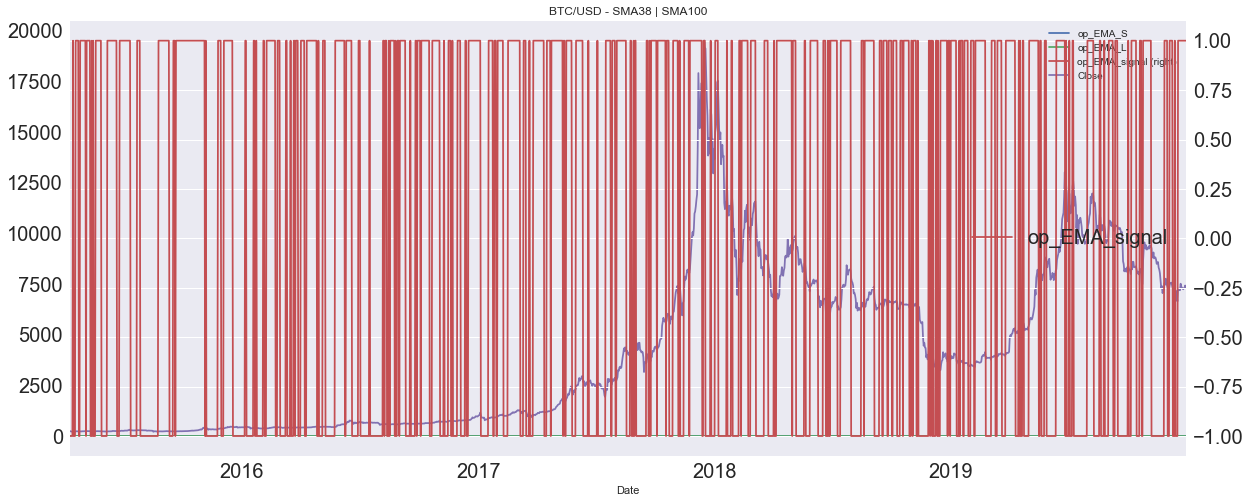

In [301]:
df.loc[:, ["op_EMA_S", "op_EMA_L", "op_EMA_signal", 'Close']].plot(figsize = (20, 8), fontsize = 20, secondary_y = "op_EMA_signal",
                                                title = "BTC/USD - SMA38 | SMA100")

plt.legend(fontsize=20)


In [302]:
X = df[['op_EMA_L', 'op_EMA_S', 'op_EMA_signal', 'Close_EMA_S']]
y = df.target

In [303]:
X.head()

,op_EMA_L,op_EMA_S,op_EMA_signal,Close_EMA_S
Date,,,,
2015-04-11,-0.004051,-0.009417,-1,1
2015-04-12,-0.003975,-0.007699,-1,1
2015-04-13,-0.005466,-0.017148,-1,-1
2015-04-14,-0.006079,-0.018774,-1,-1
2015-04-15,-0.005202,-0.009912,-1,1


In [304]:
y

Date
2015-04-11    1
2015-04-12    0
2015-04-13    0
2015-04-14    0
2015-04-15    1
             ..
2019-12-26    0
2019-12-27    1
2019-12-28    1
2019-12-29    1
2019-12-30    0
Name: target, Length: 1725, dtype: int32

<AxesSubplot:xlabel='Date'>

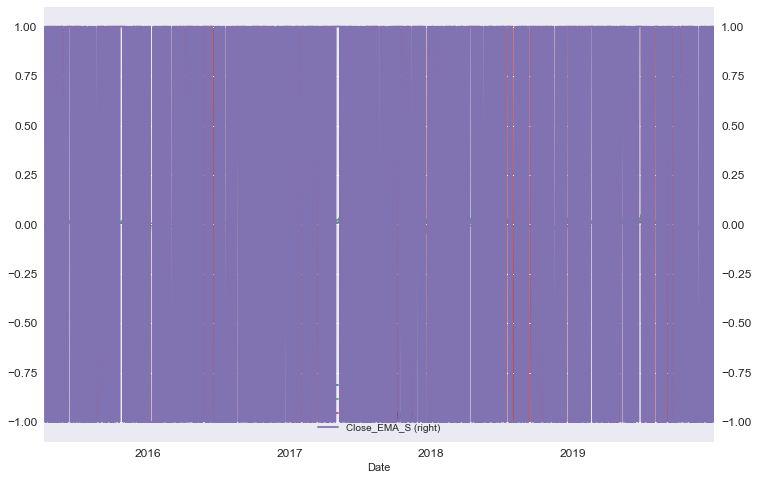

In [305]:
X.plot(figsize = (12, 8), fontsize = 12, secondary_y = "Close_EMA_S")

In [306]:
lr = LogisticRegression(C=0.1, solver='liblinear')

In [307]:
lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [308]:
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['l2']
c_values = [200,500,1000,100, 10, 1.0, 0.1, 0.01]
# define grid search

param_grid = dict(solver=solvers,penalty=penalty,C=c_values)
print(param_grid)

{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l2'], 'C': [200, 500, 1000, 100, 10, 1.0, 0.1, 0.01]}


In [309]:
grid_ser(param_grid, lr, X, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\Ahsan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'best_params': {'C': 200, 'penalty': 'l2', 'solver': 'saga'},
 'best_estimator': LogisticRegression(C=200, solver='saga'),
 'best_score': 0.9339130434782609}

In [310]:
y_pred = lr.predict(X)
print(y_pred)
print(y.values)

[1 1 0 ... 1 1 0]
[1 0 0 ... 1 1 0]


<Figure size 576x396 with 0 Axes>

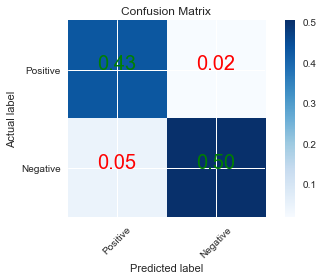

Accuracy: 0.9339
Area under the curve (AUC): 0.9364
Recall Score: 0.9128


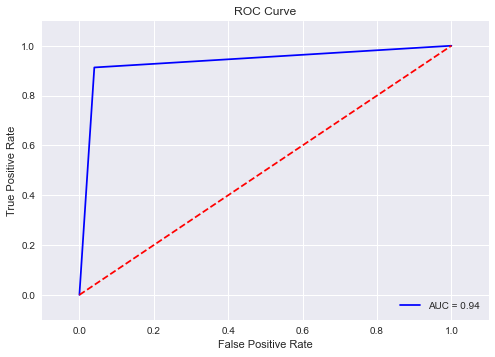

In [311]:
model_evaluation(y_pred, y)

In [312]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=6)

In [313]:
DT.fit(X, y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6)

In [314]:
y_pred_dt = DT.predict(X)
print(y_pred_dt)
print(y.values)

[1 1 0 ... 1 1 0]
[1 0 0 ... 1 1 0]


<Figure size 576x396 with 0 Axes>

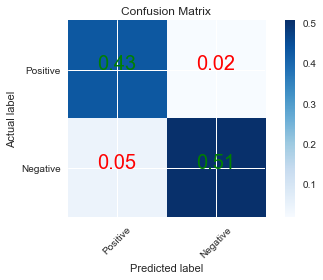

Accuracy: 0.9368
Area under the curve (AUC): 0.9391
Recall Score: 0.917


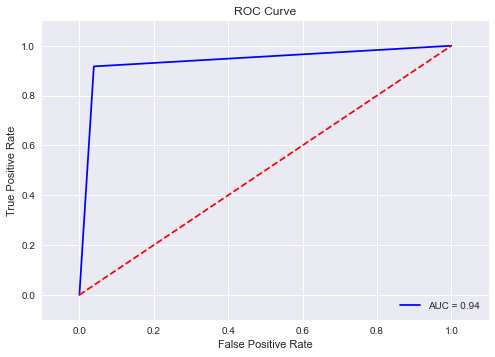

In [315]:
model_evaluation(y_pred_dt, y)

In [316]:
param_dict_dt = {"criterion": ['gini', 'entropy'],
"max_depth" : range(5,200)
}

grid_ser(param_dict_dt, DT, X, y)

Fitting 5 folds for each of 390 candidates, totalling 1950 fits


{'best_params': {'criterion': 'gini', 'max_depth': 5},
 'best_estimator': DecisionTreeClassifier(max_depth=5, min_samples_leaf=6),
 'best_score': 0.9292753623188407}

In [317]:
rf = RandomForestClassifier(criterion='entropy', max_depth=5)

In [318]:
rf.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [319]:
y_pred_rf = rf.predict(X)
print(y_pred_rf)
print(y.values)

[1 1 0 ... 1 1 0]
[1 0 0 ... 1 1 0]


<Figure size 576x396 with 0 Axes>

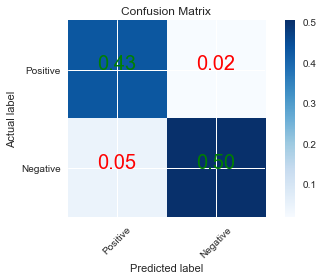

Accuracy: 0.9339
Area under the curve (AUC): 0.9364
Recall Score: 0.9128


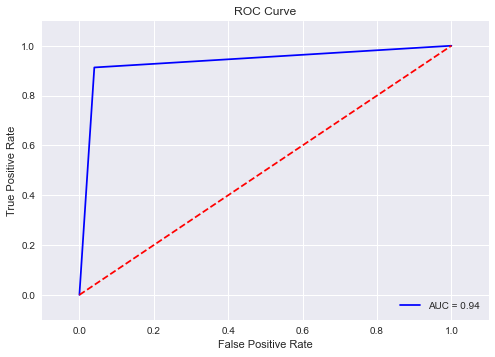

In [320]:
model_evaluation(y_pred_rf, y)

In [321]:
param_dict_rf = {"criterion": ['gini', 'entropy'],
"max_depth" : range(5,15)
}

grid_ser(param_dict_rf, rf, X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'best_params': {'criterion': 'gini', 'max_depth': 5},
 'best_estimator': RandomForestClassifier(max_depth=5),
 'best_score': 0.9339130434782609}

In [322]:
df["lr_pred"] = lr.predict(X)
df["dt_pred"] = DT.predict(X)
df["rf_pred"] = rf.predict(X)

In [323]:
df["EMA_cross"] = df.lr_pred * df.returns
df["df_EMA_cross"] = df.dt_pred * df.returns
df["rf_EMA_cross"] = df.rf_pred * df.returns

In [324]:
df["Buy and Hold"] = df["returns"].cumsum().apply(np.exp)
df["Trenn System"] = df["EMA_cross"].cumsum().apply(np.exp)
df["dtTrenn System"] = df["df_EMA_cross"].cumsum().apply(np.exp)
df["rfTrenn System"] = df["rf_EMA_cross"].cumsum().apply(np.exp)

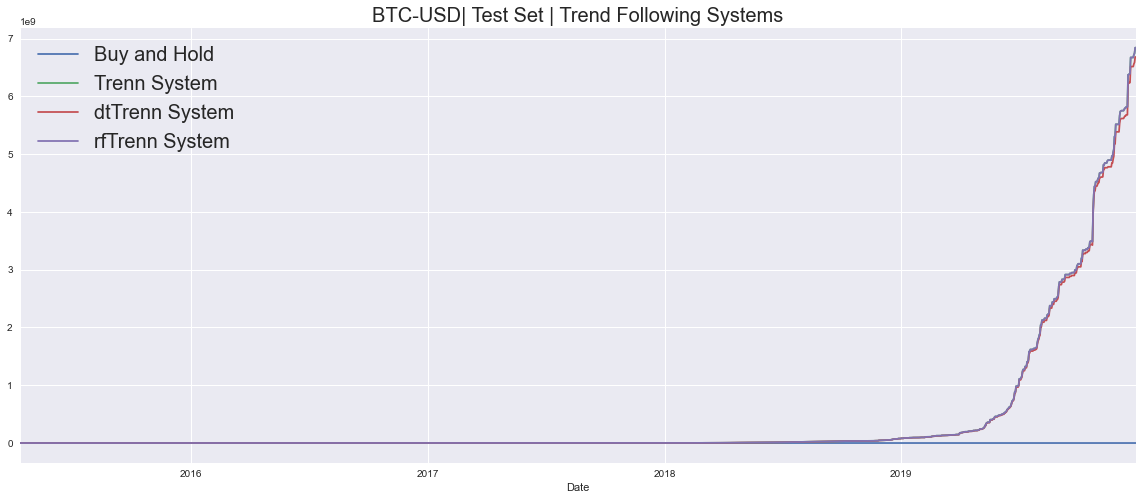

In [325]:
df[["Buy and Hold", "Trenn System", "dtTrenn System", "rfTrenn System"]].plot(figsize = (20 , 8))
plt.title('BTC-USD| Test Set | Trend Following Systems', fontsize= 20)
plt.legend(fontsize= 20)
plt.show()

In [326]:
df["trades"] = df.lr_pred.diff().fillna(0).abs()

In [327]:
df.trades.value_counts()

1.0    893
0.0    832
Name: trades, dtype: int64

In [328]:
t_df = yf.download(tickers='BTC-USD', start='2020-01-01', end='2021-12-30', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [329]:
t_df['returns'] = np.log(t_df['Close']/t_df['Close'].shift(1))

In [347]:
t_df['op_EMA_S'] = ta.EMA(t_df['returns'], timeperiod = 8)
t_df['op_EMA_L'] = ta.EMA(t_df['returns'], timeperiod = 61)

In [348]:
#t_df['Close_EMA_S'] = np.where(t_df['']> t_df['op_EMA_S'], 1, -1)
t_df['op_EMA_signal'] = np.where(t_df['op_EMA_S'] > t_df['op_EMA_L'], 1, -1)
t_df

,Open,High,Low,Close,Adj Close,Volume,returns,op_EMA_S,op_EMA_L,Close_EMA_S,...,pred,DT_pred,RF_pred,LR_strategy,DT_strategy,RF_strategy,Buy & Hold,LR_Trend System,DT_Trend System,RF_Trend System
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-20,9629.325195,9643.216797,9507.900391,9608.475586,9608.475586,44925260237,-0.002589,NaN,NaN,-1,...,1,0,0,-0.002589,-0.000000,-0.000000,0.997414,0.997414,1.000000,1.000000
2020-02-21,9611.782227,9723.014648,9589.743164,9686.441406,9686.441406,40930547513,0.008082,NaN,NaN,-1,...,1,0,0,0.008082,0.000000,0.000000,1.005507,1.005507,1.000000,1.000000
2020-02-22,9687.707031,9698.231445,9600.728516,9663.181641,9663.181641,35838025154,-0.002404,NaN,NaN,-1,...,1,0,0,-0.002404,-0.000000,-0.000000,1.003093,1.003093,1.000000,1.000000
2020-02-23,9663.318359,9937.404297,9657.791016,9924.515625,9924.515625,41185185761,0.026685,NaN,NaN,1,...,1,1,1,0.026685,0.026685,0.026685,1.030221,1.030221,1.027044,1.027044
2020-02-24,9921.583008,9951.746094,9537.042969,9650.174805,9650.174805,45080496648,-0.028032,NaN,NaN,-1,...,1,0,0,-0.028032,-0.000000,-0.000000,1.001743,1.001743,1.027044,1.027044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625,50809.515625,20964372926,0.007500,0.006541,-0.001075,1,...,1,1,1,0.007500,0.007500,0.007500,5.274315,5.274315,675.632100,675.632100
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,-0.003334,0.004347,-0.001148,1,...,1,1,1,-0.003334,-0.003334,-0.003334,5.256762,5.256762,673.383549,673.383549
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,-0.062151,-0.010431,-0.003116,-1,...,1,0,0,-0.062151,-0.000000,-0.000000,4.939992,4.939992,673.383549,673.383549


In [351]:
t_df['Close_EMA_S'] = np.where(t_df['returns']> t_df['op_EMA_S'], 1, -1)
t_df['op_EMA_signal'] = np.where(t_df['op_EMA_S'] > t_df['op_EMA_L'], 1, -1)
t_df

,Open,High,Low,Close,Adj Close,Volume,returns,op_EMA_S,op_EMA_L,Close_EMA_S,...,pred,DT_pred,RF_pred,LR_strategy,DT_strategy,RF_strategy,Buy & Hold,LR_Trend System,DT_Trend System,RF_Trend System
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-20,9629.325195,9643.216797,9507.900391,9608.475586,9608.475586,44925260237,-0.002589,NaN,NaN,-1,...,1,0,0,-0.002589,-0.000000,-0.000000,0.997414,0.997414,1.000000,1.000000
2020-02-21,9611.782227,9723.014648,9589.743164,9686.441406,9686.441406,40930547513,0.008082,NaN,NaN,-1,...,1,0,0,0.008082,0.000000,0.000000,1.005507,1.005507,1.000000,1.000000
2020-02-22,9687.707031,9698.231445,9600.728516,9663.181641,9663.181641,35838025154,-0.002404,NaN,NaN,-1,...,1,0,0,-0.002404,-0.000000,-0.000000,1.003093,1.003093,1.000000,1.000000
2020-02-23,9663.318359,9937.404297,9657.791016,9924.515625,9924.515625,41185185761,0.026685,NaN,NaN,-1,...,1,1,1,0.026685,0.026685,0.026685,1.030221,1.030221,1.027044,1.027044
2020-02-24,9921.583008,9951.746094,9537.042969,9650.174805,9650.174805,45080496648,-0.028032,NaN,NaN,-1,...,1,0,0,-0.028032,-0.000000,-0.000000,1.001743,1.001743,1.027044,1.027044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625,50809.515625,20964372926,0.007500,0.006541,-0.001075,1,...,1,1,1,0.007500,0.007500,0.007500,5.274315,5.274315,675.632100,675.632100
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,-0.003334,0.004347,-0.001148,-1,...,1,1,1,-0.003334,-0.003334,-0.003334,5.256762,5.256762,673.383549,673.383549
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,-0.062151,-0.010431,-0.003116,-1,...,1,0,0,-0.062151,-0.000000,-0.000000,4.939992,4.939992,673.383549,673.383549


In [352]:
t_df["direction"] = np.sign(t_df.returns)

In [353]:
t_df.dropna(inplace= True)

In [354]:
X_test = t_df[['op_EMA_L', 'op_EMA_S', 'op_EMA_signal', 'Close_EMA_S']]
y = t_df.direction

In [355]:
t_df["pred"] = lr.predict(X_test)
t_df["DT_pred"] = DT.predict(X_test)
t_df["RF_pred"] = rf.predict(X_test)

In [356]:
t_df

,Open,High,Low,Close,Adj Close,Volume,returns,op_EMA_S,op_EMA_L,Close_EMA_S,...,pred,DT_pred,RF_pred,LR_strategy,DT_strategy,RF_strategy,Buy & Hold,LR_Trend System,DT_Trend System,RF_Trend System
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-20,7186.873535,7240.290527,6835.502930,6881.958496,6881.958496,37747113936,-0.043708,-0.005601,-0.005514,-1,...,0,0,0,-0.043708,-0.000000,-0.000000,0.714386,0.714386,1.901871,1.901871
2020-04-21,6879.784180,6934.551758,6834.442383,6880.323242,6880.323242,32589741511,-0.000238,-0.004409,-0.005343,1,...,1,1,1,-0.000238,-0.000000,-0.000000,0.714216,0.714216,1.901871,1.901871
2020-04-22,6879.440430,7145.865723,6867.781738,7117.207520,7117.207520,33249153866,0.033850,0.004093,-0.004079,1,...,1,1,1,0.033850,0.033850,0.033850,0.738806,0.738806,1.967351,1.967351
2020-04-23,7121.306152,7491.785156,7081.594727,7429.724609,7429.724609,43500782316,0.042973,0.012733,-0.002561,1,...,1,1,1,0.042973,0.042973,0.042973,0.771247,0.771247,2.053737,2.053737
2020-04-24,7434.181641,7574.195801,7434.181641,7550.900879,7550.900879,34636526286,0.016178,0.013499,-0.001957,1,...,1,1,1,0.016178,0.016178,0.016178,0.783826,0.783826,2.087233,2.087233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,50428.691406,51196.378906,49623.105469,50809.515625,50809.515625,20964372926,0.007500,0.006541,-0.001075,1,...,1,1,1,0.007500,0.007500,0.007500,5.274315,5.274315,675.632100,675.632100
2021-12-27,50802.609375,51956.328125,50499.468750,50640.417969,50640.417969,24324345758,-0.003334,0.004347,-0.001148,-1,...,0,0,0,-0.003334,-0.003334,-0.003334,5.256762,5.256762,673.383549,673.383549
2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883,-0.062151,-0.010431,-0.003116,-1,...,0,0,0,-0.062151,-0.000000,-0.000000,4.939992,4.939992,673.383549,673.383549


In [357]:
t_df.pred.value_counts()

1    311
0    309
Name: pred, dtype: int64

In [358]:
t_df.DT_pred.value_counts()

1    312
0    308
Name: DT_pred, dtype: int64

In [359]:
t_df.RF_pred.value_counts()

1    311
0    309
Name: RF_pred, dtype: int64

In [360]:
lr_hits = np.sign(t_df.direction * t_df.pred).value_counts()

In [361]:
dt_hits = np.sign(t_df.direction * t_df.DT_pred).value_counts()

In [362]:
rf_hits = np.sign(t_df.direction * t_df.RF_pred).value_counts()

In [363]:
t_df["LR_strategy"] = t_df.pred * t_df.returns
t_df["DT_strategy"] = t_df.DT_pred * t_df.returns
t_df["RF_strategy"] = t_df.RF_pred * t_df.returns

In [364]:
t_df["Buy & Hold"] = t_df["returns"].cumsum().apply(np.exp)
t_df["LR_Trend System"] = t_df["LR_strategy"].cumsum().apply(np.exp)
t_df["DT_Trend System"] = t_df["DT_strategy"].cumsum().apply(np.exp)
t_df["RF_Trend System"] = t_df["RF_strategy"].cumsum().apply(np.exp)

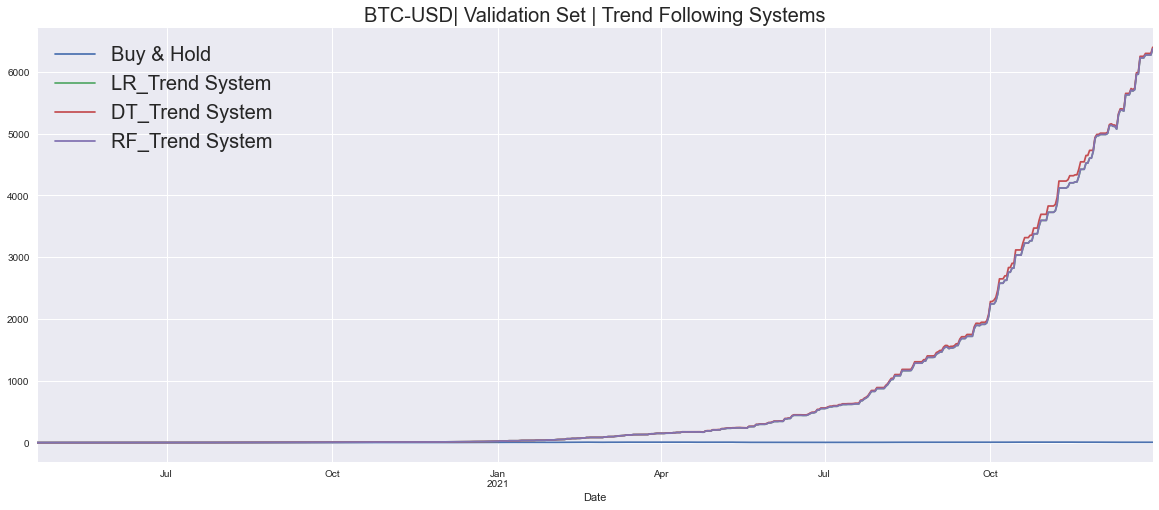

In [367]:
t_df[["Buy & Hold", "LR_Trend System", 'DT_Trend System','RF_Trend System']].plot(figsize = (20 , 8))
plt.title('BTC-USD| Validation Set | Trend Following Systems', fontsize= 20)
plt.legend(fontsize= 20)
plt.show()

<AxesSubplot:xlabel='Date'>

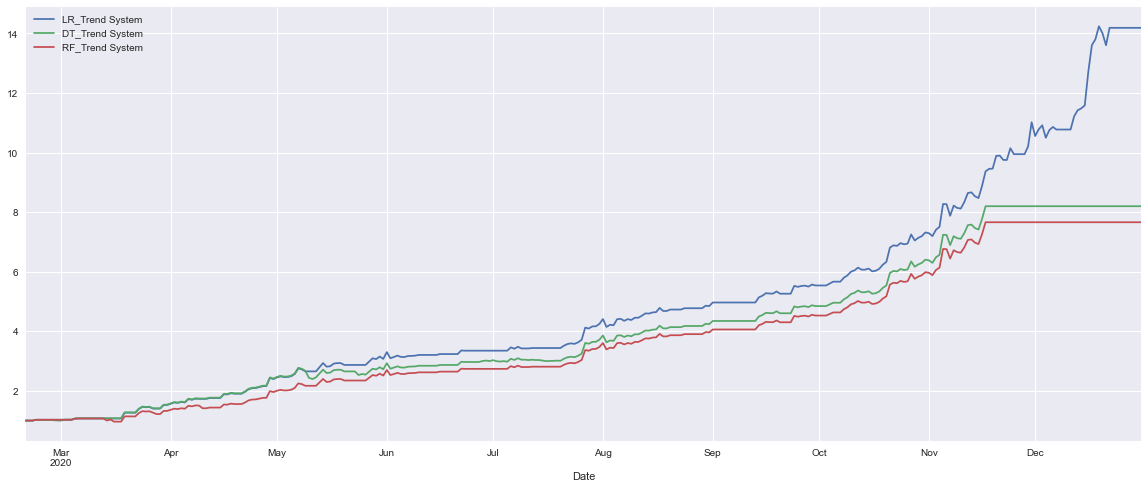

In [249]:
t_df.loc[:'2020-12',["LR_Trend System", 'DT_Trend System','RF_Trend System']].plot(figsize = (20 , 8))

In [175]:
LogisticRegressionReturn = t_df[["returns", "LR_Trend System"]].mean()

In [176]:
DecisionTreeReturn = t_df[["returns", "DT_Trend System"]].mean() 

In [177]:
RandomForestReturn = t_df[["returns", "RF_Trend System"]].mean() 

In [178]:
LogisticRegressionReturn

returns             0.002336
LR_Trend System    16.150645
dtype: float64

In [179]:
DecisionTreeReturn

returns            0.002336
DT_Trend System    6.275908
dtype: float64

In [1163]:
RandomForestReturn

returns             0.003014
RF_Trend System    10.153365
dtype: float64

In [1171]:
t_df[["returns", "RF_Trend System"]].std() * np.sqrt(365)

returns              0.710746
RF_Trend System    172.810522
dtype: float64

In [1204]:
daily_return =t_df['RF_Trend System'].pct_change(1)
buy = daily_return.sum()
buy

3.630036519635297

In [1196]:
RF_mean = daily_return.mean()*252
RF_mean

1.475434198303379

In [1197]:
log_rf = np.log(t_df['RF_Trend System']/t_df['RF_Trend System'].shift(1))
log_rf.mean() * 252

1.347239675374578

In [1198]:
std = daily_return.std()*np.sqrt(252)

In [1199]:
std

0.5029149547199171

In [1207]:
rfr = 140

In [1208]:
shapre = (buy-rfr/100)/std

In [1209]:
shapre

4.434221927000057